In [199]:
import tensorflow as tf
from keras import layers, models
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras import regularizers
from keras import optimizers

# Building NN model

In [200]:
def leaky_relu(x):
    return tf.nn.leaky_relu(x, alpha=0.2)

input_shape = 300
output_shape = 6
model = models.Sequential()
model.add(layers.Dense(500, activation='tanh', input_shape=(300,)))
model.add(layers.Dense(250, activation='tanh'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(output_shape, activation='softmax')) 

sgd = optimizers.SGD(learning_rate=0.1)



In [201]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 500)               150500    
                                                                 
 dense_68 (Dense)            (None, 250)               125250    
                                                                 
 dropout_24 (Dropout)        (None, 250)               0         
                                                                 
 dense_69 (Dense)            (None, 6)                 1506      
                                                                 
Total params: 277256 (1.06 MB)
Trainable params: 277256 (1.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Load Data

In [202]:
X_train = np.load('Data/Vectors/X_train.npy')
Y_train = np.load('Data/Vectors/Y_train.npy')[:, [0, 1, 2, 3, 4, 5]]
X_test = np.load('Data/Vectors/X_test.npy')
Y_test = np.load('Data/Vectors/Y_test.npy')[:, [0, 1, 2, 3, 4, 5]]
X_validation = np.load('Data/Vectors/X_validate.npy')
Y_validation = np.load('Data/Vectors/Y_validate.npy')[:, [0, 1, 2, 3, 4, 5]]

# Train

Epoch 1/10
7500/7500 [==============================] - 20s 3ms/step - loss: 1.0016 - accuracy: 0.6104 - val_loss: 0.9859 - val_accuracy: 0.6146
Epoch 2/10
7500/7500 [==============================] - 21s 3ms/step - loss: 0.9980 - accuracy: 0.6128 - val_loss: 0.9935 - val_accuracy: 0.6116
Epoch 3/10
7500/7500 [==============================] - 41s 5ms/step - loss: 0.9968 - accuracy: 0.6121 - val_loss: 0.9911 - val_accuracy: 0.6080
Epoch 4/10
7500/7500 [==============================] - 42s 6ms/step - loss: 0.9948 - accuracy: 0.6136 - val_loss: 0.9774 - val_accuracy: 0.6189
Epoch 5/10
7500/7500 [==============================] - 42s 6ms/step - loss: 0.9929 - accuracy: 0.6147 - val_loss: 0.9778 - val_accuracy: 0.6190
Epoch 6/10
7500/7500 [==============================] - 42s 6ms/step - loss: 0.9913 - accuracy: 0.6145 - val_loss: 0.9881 - val_accuracy: 0.6154
Epoch 7/10
7500/7500 [==============================] - 42s 6ms/step - loss: 0.9889 - accuracy: 0.6149 - val_loss: 0.9918 - val_ac

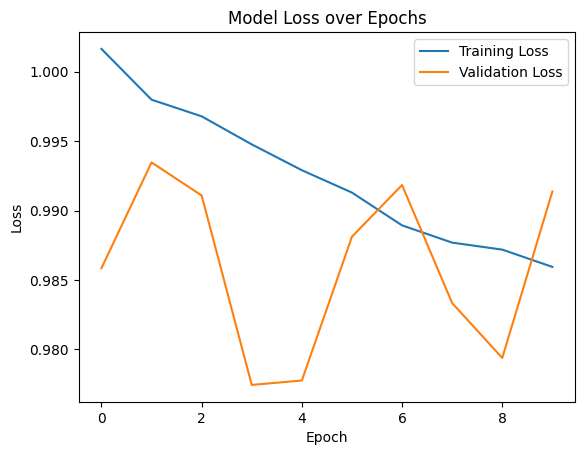

In [209]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_validation, Y_validation))

# Plotting the training and validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Adding title and labels to the plot
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [208]:
# Save the model
SAVE = False
if SAVE:
    model.save('my_model') 

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


# Evaluate

In [205]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

938/938 [==============================] - 1s 1ms/step - loss: 1.0007 - accuracy: 0.6146
Loss: 1.0007072687149048, Accuracy: 0.614633321762085


# Confusion Matrix

938/938 [==============================] - 2s 3ms/step


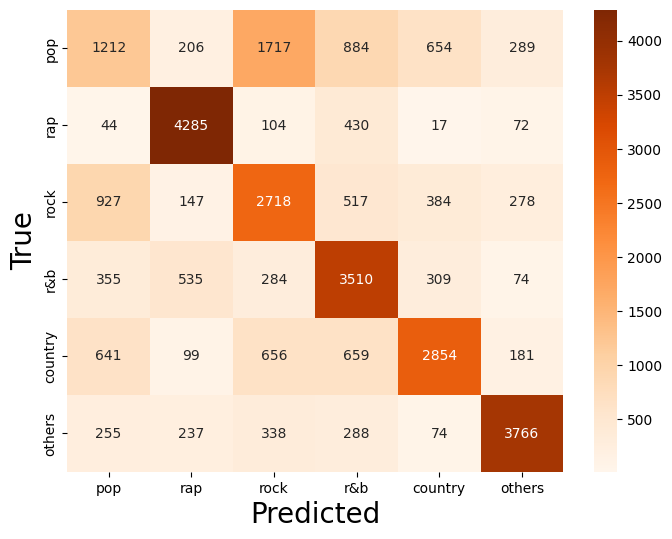

In [210]:

Y_pred = model.predict(X_test)


# Convert one-hot encoded vectors back to categorical values
Y_test_categorical = np.argmax(Y_test, axis=1)
Y_pred_categorical = np.argmax(Y_pred, axis=1)


# Create a confusion matrix
cm = confusion_matrix(Y_test_categorical, Y_pred_categorical)

# Visualize the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['pop','rap', 'rock', 'r&b', 'country' , 'others'], yticklabels=['pop','rap', 'rock', 'r&b', 'country', 'others'])
plt.ylabel('True', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.show()


Accuracy: 0.6146333333333334
Precision: [0.3352649  0.79267372 0.44871617 0.62890855 0.58645061 0.85727901]
Recall: [0.16324063 0.84773829 0.65037216 0.63114269 0.66836935 0.72569585]
F1-Score: [0.2195717  0.81928181 0.53104468 0.63002364 0.62473602 0.78601857]


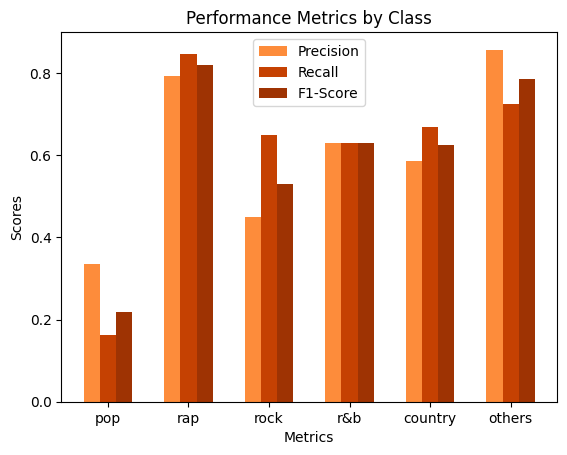

In [207]:
# Assuming you have predicted values stored in 'Y_pred_categorical' and true labels stored in 'Y_test_categorical'

# Accuracy
accuracy = accuracy_score(Y_test_categorical, Y_pred_categorical)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(Y_test_categorical, Y_pred_categorical, average=None)  # You can choose 'micro', 'macro', 'weighted', or 'samples' as per your requirement
print(f"Precision: {precision}")

# Recall
recall = recall_score(Y_test_categorical, Y_pred_categorical, average=None)  # You can choose 'micro', 'macro', 'weighted', or 'samples' as per your requirement
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(Y_test_categorical, Y_pred_categorical, average=None)  # You can choose 'micro', 'macro', 'weighted', or 'samples' as per your requirement
print(f"F1-Score: {f1}")



# Labels for the classes
classes = ['pop','rap', 'rock', 'r&b', 'country', 'others']

num_colors = 10

# Create the colormap
cmap = plt.get_cmap('Oranges')

# Generate the array of colors
colors = [cmap(i / num_colors) for i in range(num_colors)]

# Plotting Precision, Recall, and F1-Score
x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision', color=colors[5])
rects2 = ax.bar(x, recall, width, label='Recall', color=colors[8])
rects3 = ax.bar(x + width, f1, width, label='F1-Score', color=colors[9])

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

plt.show()
